In [2]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

In [3]:
T_Nanya = [92.15,92,92.07,92.26,92.47,92.57,92.62,92.61,92.62,92.78,92.92,92.89,92.82,92.77,92.73,92.69,92.64,92.57,92.45,92.2,91.96,91.9,91.87,91.8,91.69,91.5,91.31,91.21,91.11,90.96,90.72]
w_Nanya = np.linspace(400,700,31)
w_Nanya2 = np.linspace(400,700,61)

In [4]:
wl = np.linspace(380, 780, 401)
sec = pd.read_csv('./spectrum/Nanya/Bonsai_R_5_2nd.csv')['SCAN'].values
tap = pd.read_csv('./spectrum/Nanya/Bonsai_R_5_B.csv')['SCAN'].values
T1 = pd.read_csv('./spectrum/Nanya/Bonsai_T_0.csv')['SCAN'].values
T1_Macleod = pd.read_csv('./spectrum/Nanya/Bonsai_Macleod_T.csv')['T_0'].values
T2_Macleod = pd.read_csv('./spectrum/Nanya/Bonsai_Macleod_T.csv')['T_00'].values

air = ml.Non_Dispersion(1)
SiO2 = ml.open_material('SiO2_Nanya', 'Material')
NB = ml.open_material('Nb2O5_Nanya', 'Material')
ITO2 = ml.open_material('ITO_Nanya', 'Material')
ITO1 = ml.open_material('ITO1_Nanya', 'Material')
OC = ml.open_material('OC_Nanya', 'Material')
sodalime_Nanya = ml.open_material('sodalime_Nanya', 'Material')
glass = ml.Non_Dispersion(1.5)

In [5]:
hypoU = lambda th:tm.Design(
    [air, SiO2, ITO2, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], th[2], th[3], None]
)

hypoD = lambda th:tm.Design(
    [sodalime_Nanya, NB, SiO2, ITO2, SiO2, air],
    [None, th[3], th[2], th[1], th[0], None]
)

Bare_glass = tm.Design(
    [sodalime_Nanya, air],
    [None, None]
)

RB, TB  = Bare_glass.reflec_trans(wl)
hypo_T = lambda th:(hypoU(th).transmittance(wl)*TB)/(1-hypoD(th).reflectance(wl)*RB)
fom = lambda th:sum(abs(hypo_T(th)-T1/100+th[-1]))

In [11]:
sol = differential_evolution(fom, [(70, 80), (25,32), (30, 50), (6,10),(-0.5,0.5)])
print(sol.x)

[7.00000000e+01 2.50000000e+01 3.00000000e+01 8.06864252e+00
 3.11428768e-02]


In [14]:
sol2 = minimize(fom, sol.x, method='Nelder-Mead')
print(sol2.x)

[ 6.14198007e+01 -3.32954298e+01  1.56874799e+02  5.83329744e+00
 -6.23645266e-02]


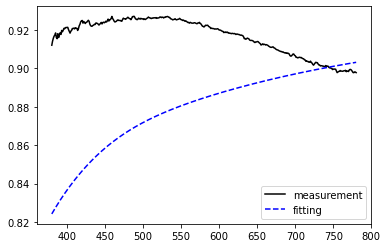

In [9]:
f1 = [70, 28, 40, 6]
f2 = [76, 30, 45.3, 7.8]
tk = f1
#plt.plot(wl, hypoU(f1).transmittance(wl),'--b')
#plt.plot(w_Nanya, np.array(T_Nanya)/100, '-r', label = 'measurement')
plt.plot(wl, T1/100,'-k', label = 'measurement')
#plt.plot(w_Nanya2, np.array(T1_Macleod)/100, '--b', label = 'Macleod')
plt.plot(wl, hypo_T(tk), '--b', label = 'fitting')
plt.legend(loc = 'best')
#plt.savefig('Nanya_Bonsai_T.png')
plt.show()
#plt.plot(w_Nanya2, np.array(T2_Macleod)/100)
#plt.plot(wl, hypo_T(sol.x), '-b', label = 'fitting')
#plt.show()